In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [108]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [109]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [110]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [111]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [112]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")

In [113]:
svr.fit(X, y.ravel())

SVR()

In [114]:
print(sc_y.inverse_transform(svr.predict(sc_x.transform([[6.5]])).reshape(-1,1)))

[[170370.0204065]]


In [115]:
# Visualization
X_inversed = sc_x.inverse_transform(X)
y_inversed = sc_y.inverse_transform(y)

In [116]:
print(X_inversed)
print(y_inversed)

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]
[[  45000.]
 [  50000.]
 [  60000.]
 [  80000.]
 [ 110000.]
 [ 150000.]
 [ 200000.]
 [ 300000.]
 [ 500000.]
 [1000000.]]


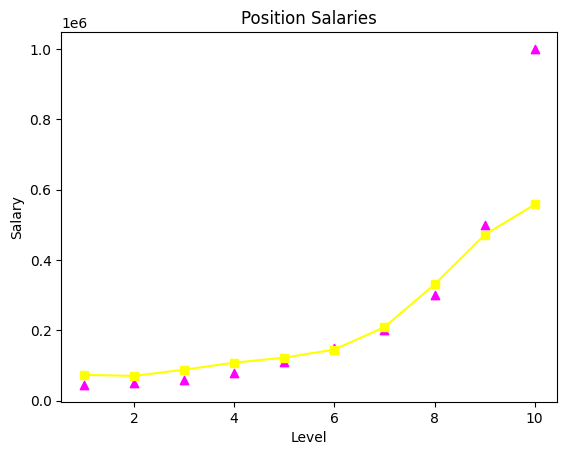

In [117]:
plt.scatter(X_inversed,y_inversed,color="magenta", marker="^")
plt.plot(X_inversed, sc_y.inverse_transform(svr.predict(X).reshape(-1,1)), color="yellow", marker="s")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Position Salaries")
plt.show()

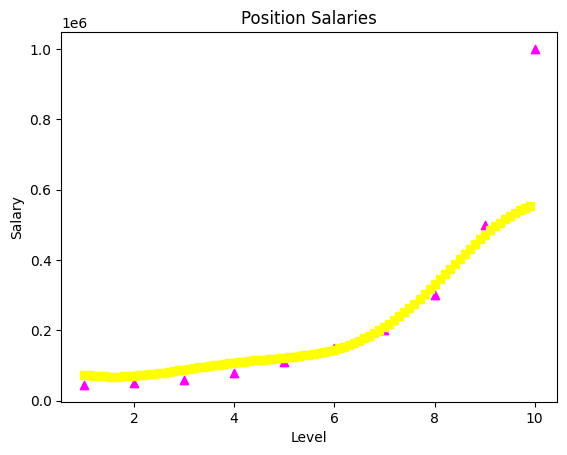

In [118]:
X_inversed = sc_x.inverse_transform(X)
y_inversed = sc_y.inverse_transform(y)
X_arranged = np.arange(min(X_inversed), max(X_inversed), 0.1)
X_arranged = X_arranged.reshape(len(X_arranged),1)
plt.scatter(X_inversed, y_inversed,color="magenta", marker="^")
plt.plot(X_arranged, sc_y.inverse_transform(svr.predict(sc_x.transform(X_arranged)).reshape(-1,1)), color="yellow", marker="s")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Position Salaries")
plt.show()